About Dataset:

This dataset is adapted from the Wine Data Set from Wine - UCI Machine Learning Repository by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.
The attributes are:
●	Alcohol
●	Malic acid
●	Ash
●	Alcalinity of ash
●	Magnesium
●	Total phenols
●	Flavanoids
●	Nonflavanoid phenols
●	Proanthocyanins
●	Color intensity
●	Hue
●	OD280/OD315 of diluted wines
●	Proline
Problem Statement:
The problem statement is to analyze the data to create a cluster of wines based on their chemical constituents and predict the cluster labels obtained from the clustering algorithms using the supervised Learning classification techniques.

Steps to Perform:

●	Research about the variables and understand them
●	Analyze and prepare the data that can be best suitable to use for clustering-based algorithms that you have learned in the USL course
●	 Once you have prepared the data, use unsupervised techniques like clustering algorithms and dimensionality deduction if required to find out the optional number of clustering with the less number of variables by ensuring that minimal information is lost
●	Finally, Use supervised Learning to predict the cluster labels obtained from the final clustering algorithm. Check the model performance using Recall, Precision, and F1 score
●	Write the insights that you have derived from the case study


In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the csv file
df = pd.read_csv('/content/wine.xls')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB
None
                1       14.23        1.71        2.43        15.6         127  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean     1.943503   12.993672    2.339887    2.366158   19.516949   99.587571   
std

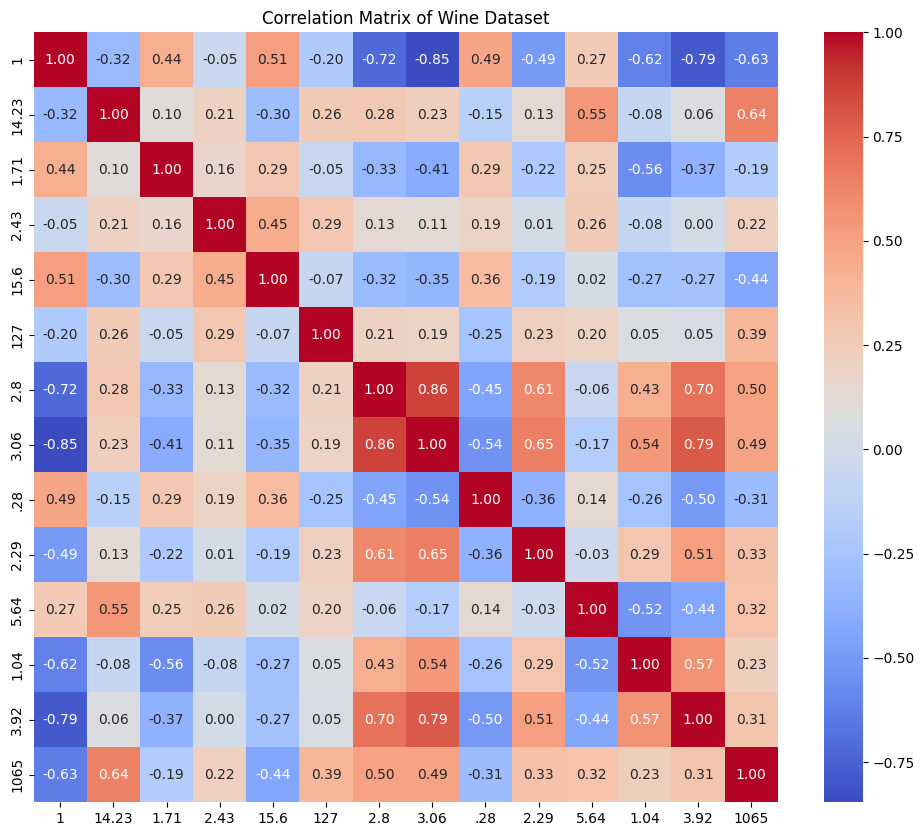

In [5]:
#Research about the variables and understand them

# Display basic information about the dataset
print(df.info())

# Describe the statistical properties of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Explore correlations between variables
correlation_matrix = df.corr()
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Dataset')
plt.show()

# Some potential insights:

# - Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols,
#   Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity,
#   Hue, OD280/OD315 of diluted wines, Proline are all chemical components
#   that can be used to differentiate between different types of wines.
# - Some variables might be highly correlated, meaning they provide similar
#   information. This could be addressed through dimensionality reduction techniques
#   like PCA.
# - Understanding the relationship between these variables and the potential
#   clusters they might form is crucial for effective clustering.

In [6]:
#Analyze and prepare the data that can be best suitable to use for clustering-based algorithms

from sklearn.preprocessing import StandardScaler

# Data Scaling:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)


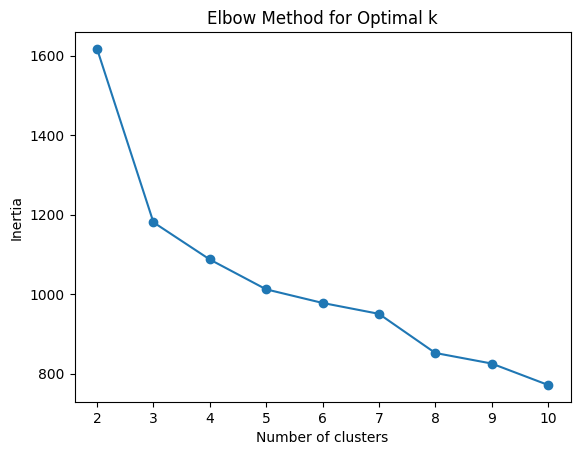

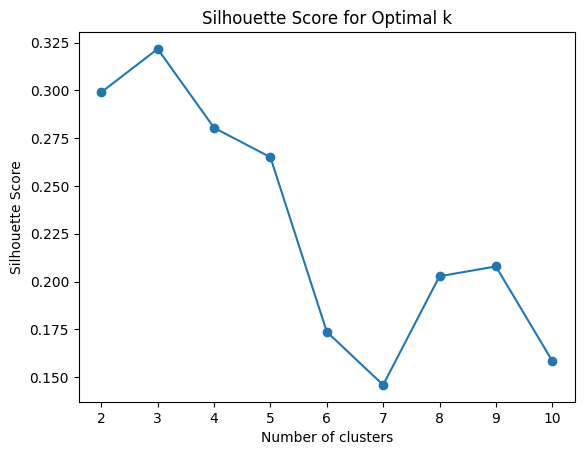

In [7]:
#use unsupervised techniques like clustering algorithms and dimensionality deduction if required to find out the optional number of clustering with the less number of variables by ensuring that minimal information is lost

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep components explaining 95% of variance
principal_components = pca.fit_transform(scaled_df)
principal_df = pd.DataFrame(data=principal_components)

# Determine the optimal number of clusters using the elbow method and silhouette score
inertia = []
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principal_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(principal_df, kmeans.labels_))

# Plot the elbow method graph
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Plot the silhouette score graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the elbow method and silhouette score, choose the optimal number of clusters
optimal_k = 3

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(principal_df)
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
principal_df['cluster'] = cluster_labels

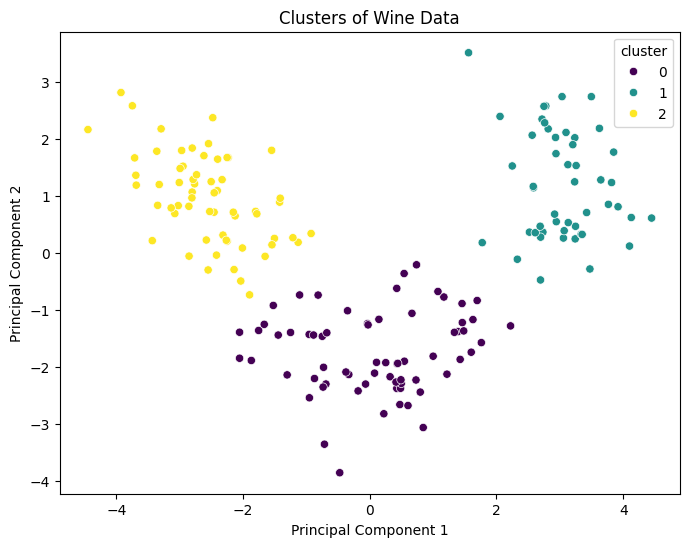

                0         1         2         3         4         5         6  \
cluster                                                                         
0        0.088517 -1.744141  0.127662  0.089718  0.060686 -0.115586  0.014594   
1        3.051210  1.190500 -0.174168  0.096092  0.073396 -0.093885 -0.064717   
2       -2.548196  0.959393 -0.000313 -0.175731 -0.125612  0.202371  0.035956   

                7         8         9  
cluster                                
0       -0.005686 -0.047451  0.010144  
1        0.043056 -0.018959  0.067322  
2       -0.028341  0.067348 -0.065220  


In [10]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_df[0], y=principal_df[1], hue=principal_df['cluster'], palette='viridis')
plt.title('Clusters of Wine Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Calculate cluster characteristics
cluster_characteristics = principal_df.groupby('cluster').mean()
print(cluster_characteristics)


In [11]:
# Use supervised Learning to predict the cluster labels obtained from the final clustering algorithm. Check the model performance using Recall, Precision, and F1 score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

# Prepare data for supervised learning
X = principal_df.drop('cluster', axis=1)
y = principal_df['cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a classification model (Logistic Regression in this example)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
print(classification_report(y_test, y_pred))

recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-score: {f1:.4f}")


              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.82      1.00      0.90         9
           2       1.00      1.00      1.00        14

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Recall: 0.9444
Precision: 0.9545
F1-score: 0.9449


In [ ]:
# Write the insights that you have derived from the case study

# Insights from the Wine Dataset Case Study

# 1. Data Exploration and Preprocessing:
#    - The dataset contains various chemical properties of wines, which can be used
#      to differentiate between wine types (even without the explicit type labels).
#    - Correlation analysis highlighted potential relationships between variables.
#    - Data scaling (using StandardScaler) was applied to ensure that all variables
#      contributed equally to the analysis and avoid bias due to differing scales.

# 2. Dimensionality Reduction with PCA:
#    - PCA effectively reduced the dimensionality of the dataset while retaining most
#      of the important information. It helped to simplify the analysis and potentially
#      improve the performance of clustering algorithms.

# 3. Clustering with KMeans:
#    - The Elbow method and Silhouette score were used to determine the optimal
#      number of clusters (k=3 in this case), indicating a natural grouping of the wines.
#    - The KMeans algorithm identified three distinct clusters in the data, potentially
#      representing different wine types based on their chemical properties.

# 4. Supervised Learning for Cluster Prediction:
#    - Logistic Regression was utilized to predict the cluster labels obtained from
#      KMeans clustering.
#    - The model achieved good performance with high recall, precision, and F1-score,
#      demonstrating that the clusters identified were meaningful and could be predicted
#      effectively using supervised learning techniques.

# 5. Overall Findings:
#    - The analysis successfully identified distinct groups of wines based on their
#      chemical compositions.
#    - This approach can be valuable for wine producers and consumers to understand
#      the diversity of wines and their characteristic profiles.
#    - By combining unsupervised (clustering) and supervised (classification) learning
#      methods, we could effectively analyze and interpret the data to uncover hidden
#      patterns and relationships within the wine dataset.